# Market Basket Analysis

In [1]:
cd C:\Users\AMF29\Downloads\InstaCart

C:\Users\AMF29\Downloads\InstaCart


**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120 #resolution
plt.rcParams['figure.figsize'] = (8,6) #figure size
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Data

In [5]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')

The dataset contains relational set of files describing customers' orders over time. For each user, 4 to 100 orders are provided with the sequence of products purchased in each order. The data of the order's week and hour of the day as well as a relative measure of time between orders is provided.

## Data Description and Analysis

### aisles:

This file contains different aisles and there are total 134 unique aisles.

In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
len(aisles.aisle.unique())

134

In [8]:
aisles.aisle.unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

### departments:
    
This file contains different departments and there are total 21 unique departments.

In [9]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
len(departments.department.unique())

21

In [11]:
departments.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

### orders:
    
This file contains all the orders made by different users. From below analysis, we can conclude following:

* There are total 3421083 orders made by total 206209 users.
* There are three sets of orders: Prior, Train and Test. The distributions of orders in Train and Test sets are similar whereas the distribution of orders in Prior set is different.
* The total orders per customer ranges from 0 to 100.
* Based on the plot of 'Orders VS Day of Week' we can map 0 and 1 as Saturday and Sunday respectively based on the assumption that most of the people buy groceries on weekends.
* Majority of the orders are made during the day time.
* Customers order once in a week which is supported by peaks at 7, 14, 21 and 30 in 'Orders VS Days since prior order' graph.
* Based on the heatmap between 'Day of Week' and 'Hour of Day,' we can say that Saturday afternoons and Sunday mornings are prime time for orders.

In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
len(orders.order_id.unique())

3421083

In [14]:
len(orders.user_id.unique())

206209

In [15]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [16]:
orders.order_number.describe().apply(lambda x: format(x, '.2f'))

count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object

In [17]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

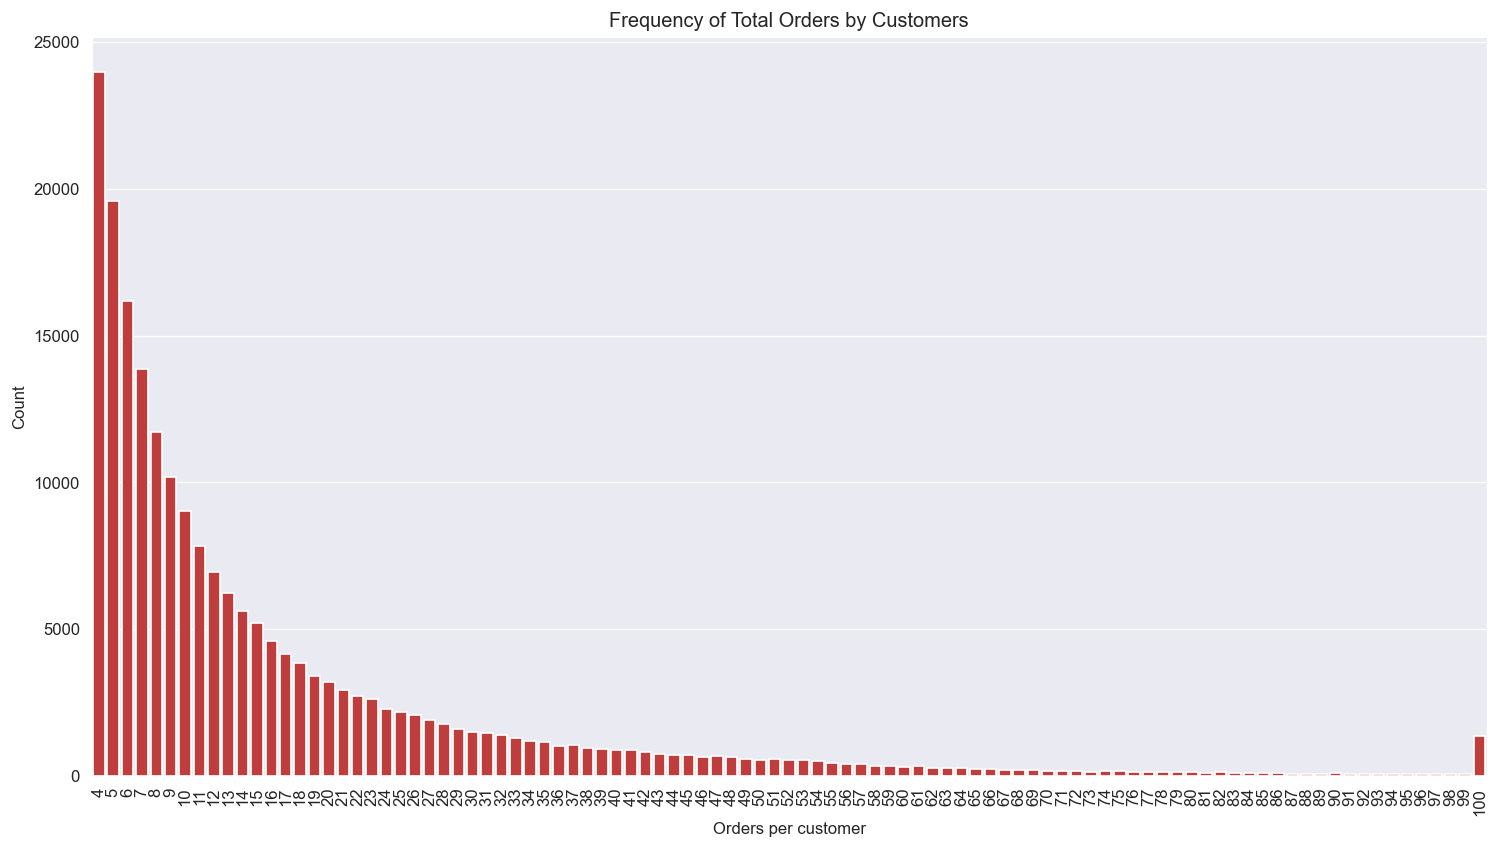

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = order_number.index, y = order_number.values, color = color[3])
ax.set_xlabel('Orders per customer')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Frequency of Total Orders by Customers');
#fig.savefig('Frequency of Total Orders by Customers.png')

In [19]:
orders.order_dow

0          2
1          3
2          3
3          4
4          4
          ..
3421078    5
3421079    4
3421080    1
3421081    1
3421082    6
Name: order_dow, Length: 3421083, dtype: int64

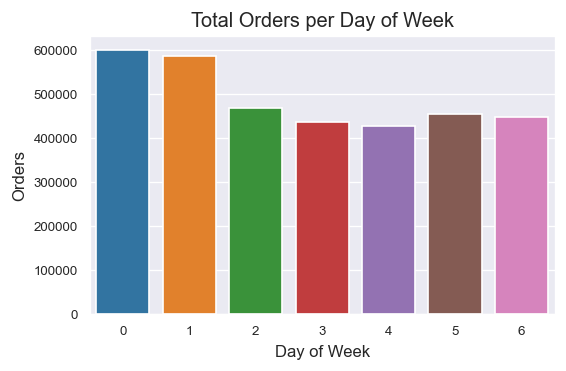

In [20]:
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.countplot(x='order_dow', data=orders)
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Orders per Day of Week')
# fig.savefig('Total Orders per Day of Week.png')
plt.show()

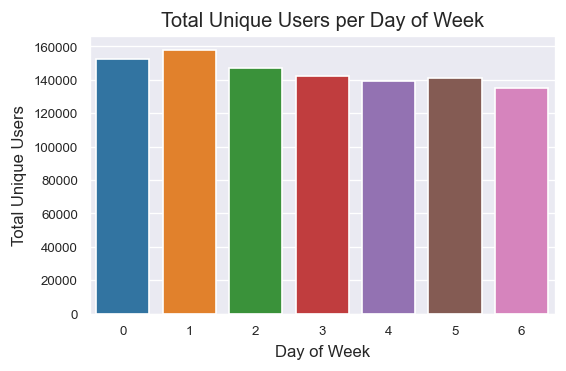

In [21]:
temp_df = orders.groupby('order_dow')['user_id'].nunique()

fig, ax = plt.subplots(figsize = (5,3))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Total Unique Users', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Unique Users per Day of Week')
#fig.savefig('Total Unique Users per Day of Week.png')
plt.show()

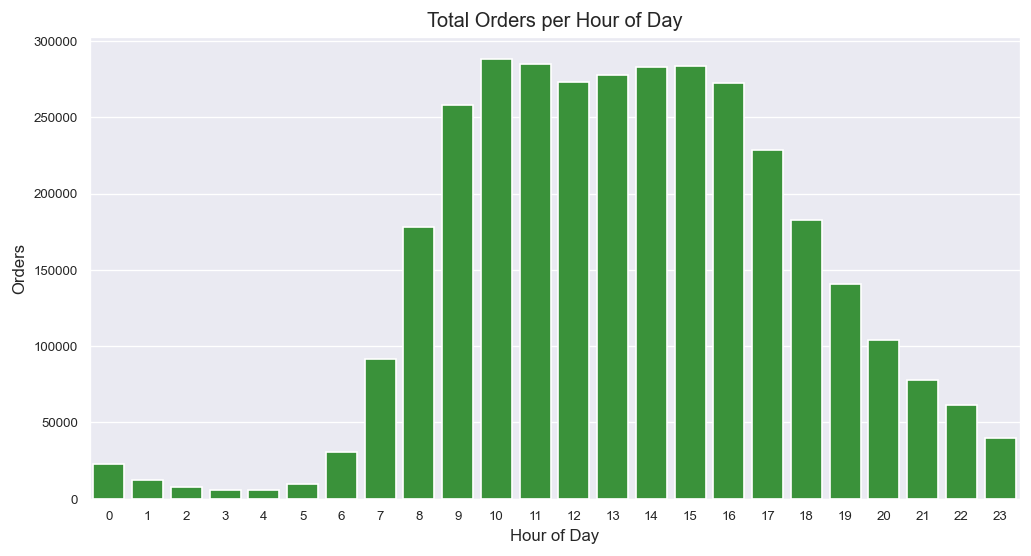

In [22]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x="order_hour_of_day", data=orders, color = color[2])
ax.set_xlabel('Hour of Day', size = 10 )
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Orders per Hour of Day')
#fig.savefig('Total Orders per Hour of Day.png')
plt.show()

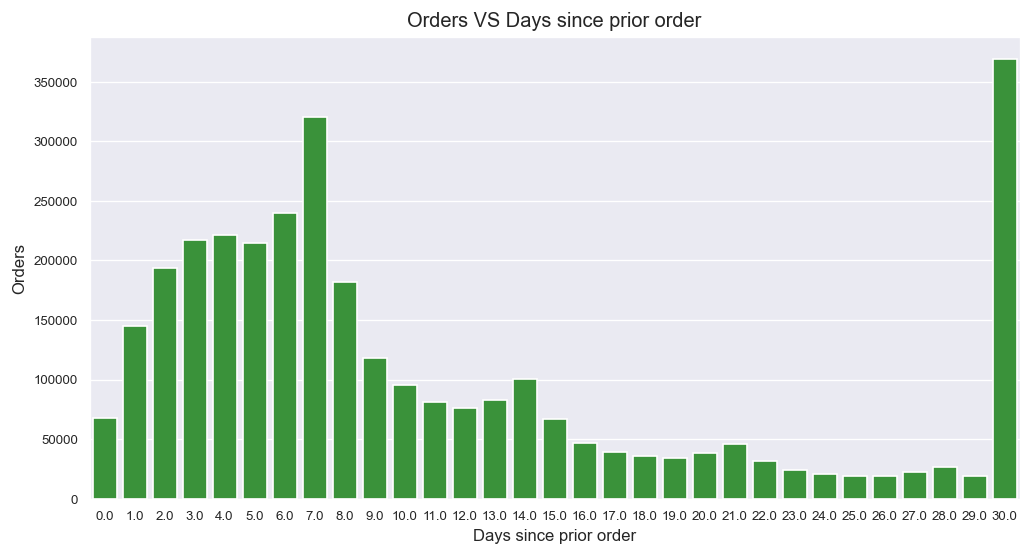

In [23]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x=orders.days_since_prior_order, data=orders, color = color[2])
ax.set_xlabel('Days since prior order', size = 10)
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Orders VS Days since prior order')
#fig.savefig('Orders VS Days since prior order.png')
plt.show()

In [24]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
temp_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


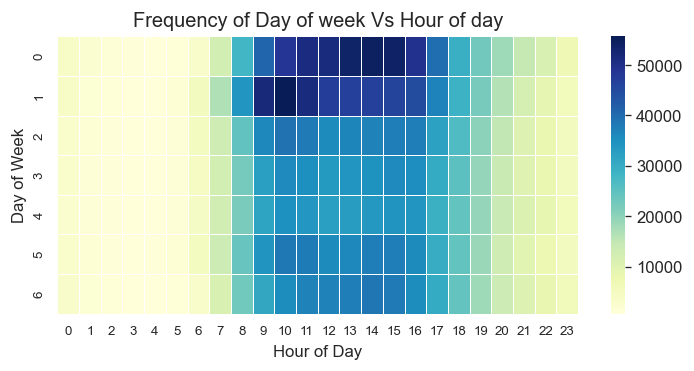

In [25]:
ax = plt.subplots(figsize=(7,3))
ax = sns.heatmap(temp_df, cmap="YlGnBu", linewidths=.5)
ax.set_title("Frequency of Day of week Vs Hour of day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
#fig.savefig("Frequency of Day of week Vs Hour of day.png")
plt.show()

### order_products_prior:
This file gives information about which products were ordered and in which order they were added in the cart. It also tells us that if the product was reordered or not.

* In this file there is an information of total 3214874 orders through which total 49677 products were ordered.
* From the 'Count VS Items in cart' plot, we can say that most of the people buy 1-15 items in an order and there were a maximum of 145 items in an order.
* The percentage of reorder items in this set is 58.97%

In [26]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [27]:
len(order_products_prior.order_id.unique())

3214874

In [28]:
len(order_products_prior.product_id.unique())

49677

In [29]:
add_to_cart_order_prior = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_prior = add_to_cart_order_prior.value_counts()
add_to_cart_order_prior.head()

5    228330
6    227675
4    222081
7    220006
3    207027
Name: add_to_cart_order, dtype: int64

In [30]:
add_to_cart_order_prior.index.max()

145

Text(0.5, 1.0, 'Frequency of Items in Cart in Prior set')

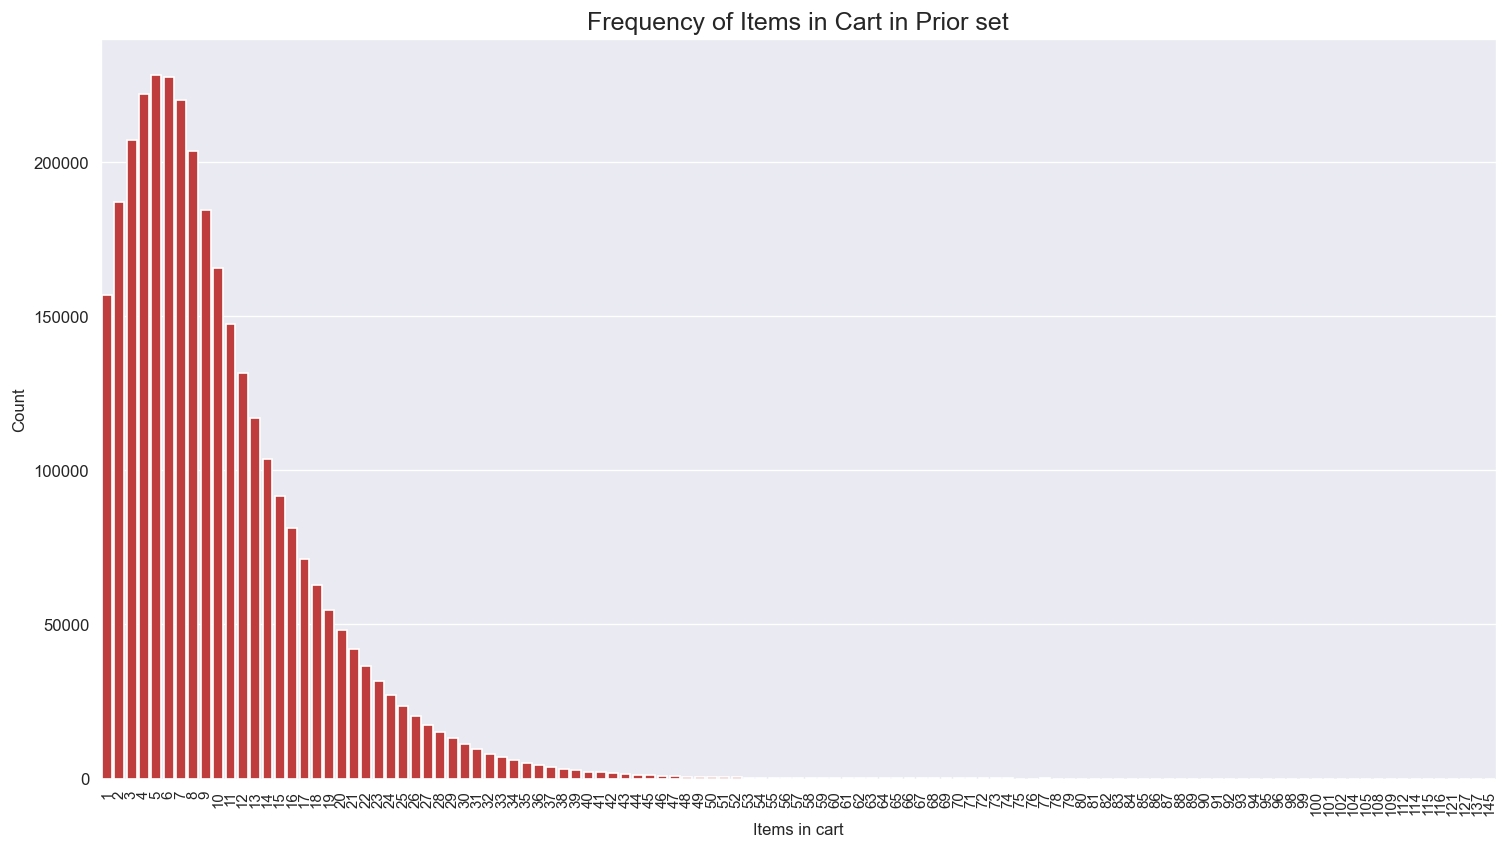

In [31]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = add_to_cart_order_prior.index, y = add_to_cart_order_prior.values, color = color[3])
ax.set_xlabel('Items in cart')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Frequency of Items in Cart in Prior set', size = 15)
# fig.savefig('Frequency of Items in Cart in Prior set.png')

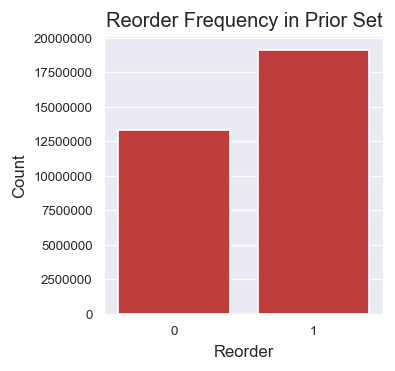

In [32]:
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.barplot(x = order_products_prior.reordered.value_counts().index, 
                y = order_products_prior.reordered.value_counts().values, color = color[3])
ax.set_xlabel('Reorder', size = 10)
ax.set_ylabel('Count', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Reorder Frequency in Prior Set')
# fig.savefig('Reorder Frequency in Prior Set.png')
plt.show()

In [33]:
print('Percentage of reorder in prior set:',
      format(order_products_prior[order_products_prior.reordered == 1].shape[0]*100/order_products_prior.shape[0], '.2f'))

Percentage of reorder in prior set: 58.97


### order_products_train:
This file gives information about which products were ordered and in which order they were added in the cart. It also tells us that if the product was reordered or not.

* In this file there is an information of total 131209 orders through which total 39123 products were ordered.
* From the 'Count VS Items in cart' plot, we can say that most of the people buy 1-15 items in an order and there were a maximum of 145 items in an order.
* The percentage of reorder items in this set is 59.86%.

In [34]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [35]:
len(order_products_train.order_id.unique())

131209

In [36]:
len(order_products_train.product_id.unique())

39123

In [37]:
add_to_cart_order_train = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_train = add_to_cart_order_train.value_counts()
add_to_cart_order_train.head()

5    228330
6    227675
4    222081
7    220006
3    207027
Name: add_to_cart_order, dtype: int64

In [38]:
add_to_cart_order_train.index.max()

145

Text(0.5, 1.0, 'Frequency of Items in Cart in Train set')

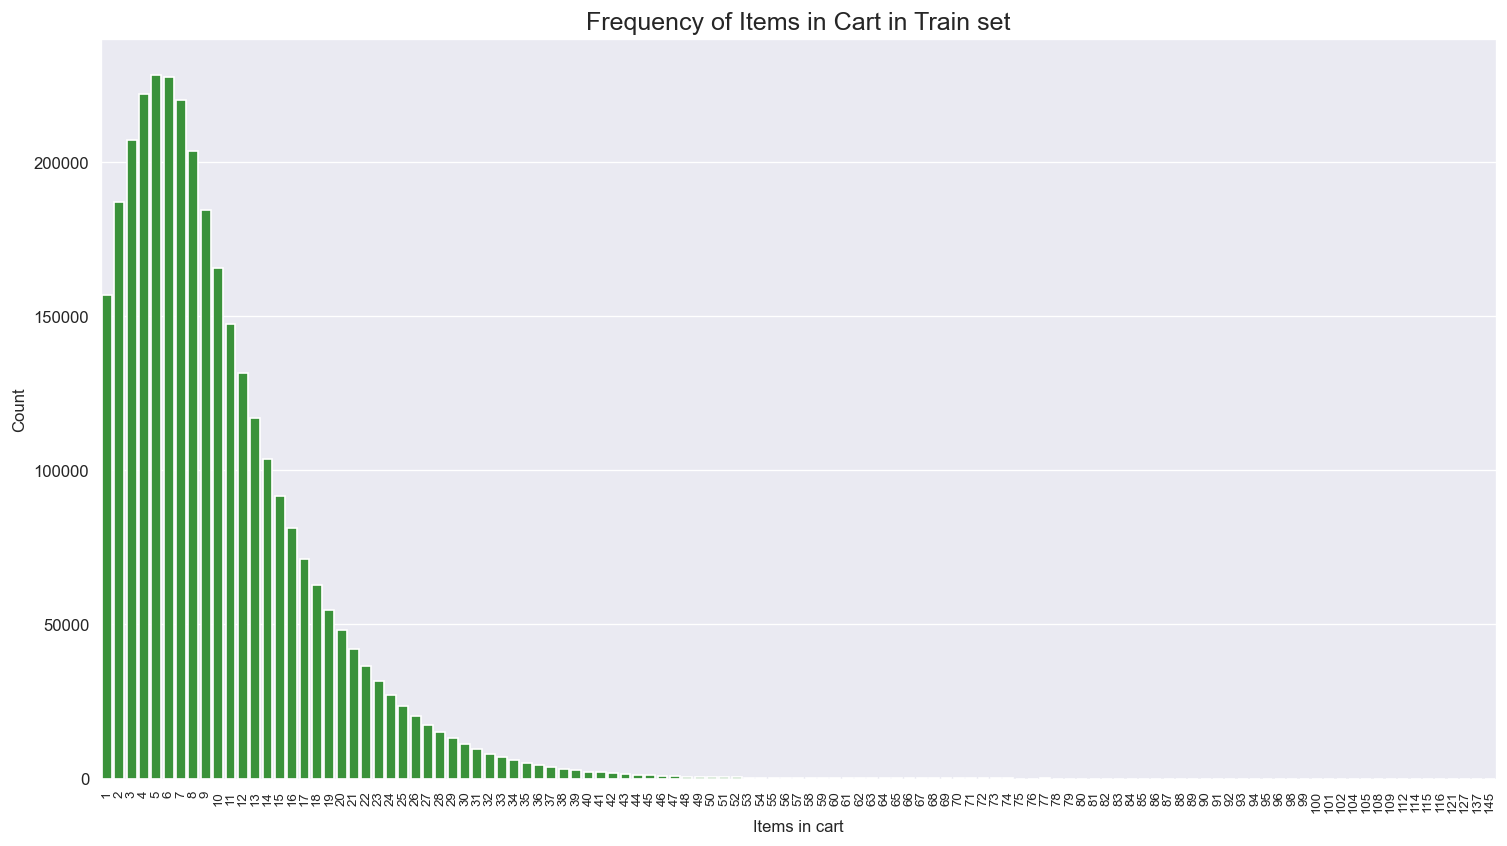

In [39]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = add_to_cart_order_train.index, y = add_to_cart_order_train.values, color = color[2])
ax.set_xlabel('Items in cart')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize = 8)
ax.set_title('Frequency of Items in Cart in Train set', size = 15)
#fig.savefig('Frequency of Items in Cart in Train set.png')

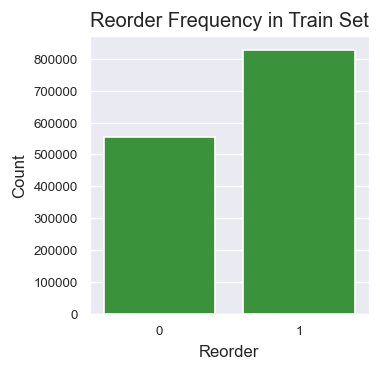

In [40]:
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.barplot(x = order_products_train.reordered.value_counts().index, 
                y = order_products_train.reordered.value_counts().values, color = color[2])
ax.set_xlabel('Reorder', size = 10)
ax.set_ylabel('Count', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Reorder Frequency in Train Set')
#fig.savefig('Reorder Frequency in Train Set')
plt.show()

In [41]:
print('Percentage of reorder in train set:',
      format(order_products_train[order_products_train.reordered == 1].shape[0]*100/order_products_train.shape[0], '.2f'))

Percentage of reorder in train set: 59.86


### products:
This file contains the list of total 49688 products and their aisle as well as department. The number of products in different aisles and different departments are different.

In [42]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [43]:
len(products.product_name.unique())

49688

In [44]:
len(products.aisle_id.unique())

134

In [45]:
len(products.department_id.unique())

21

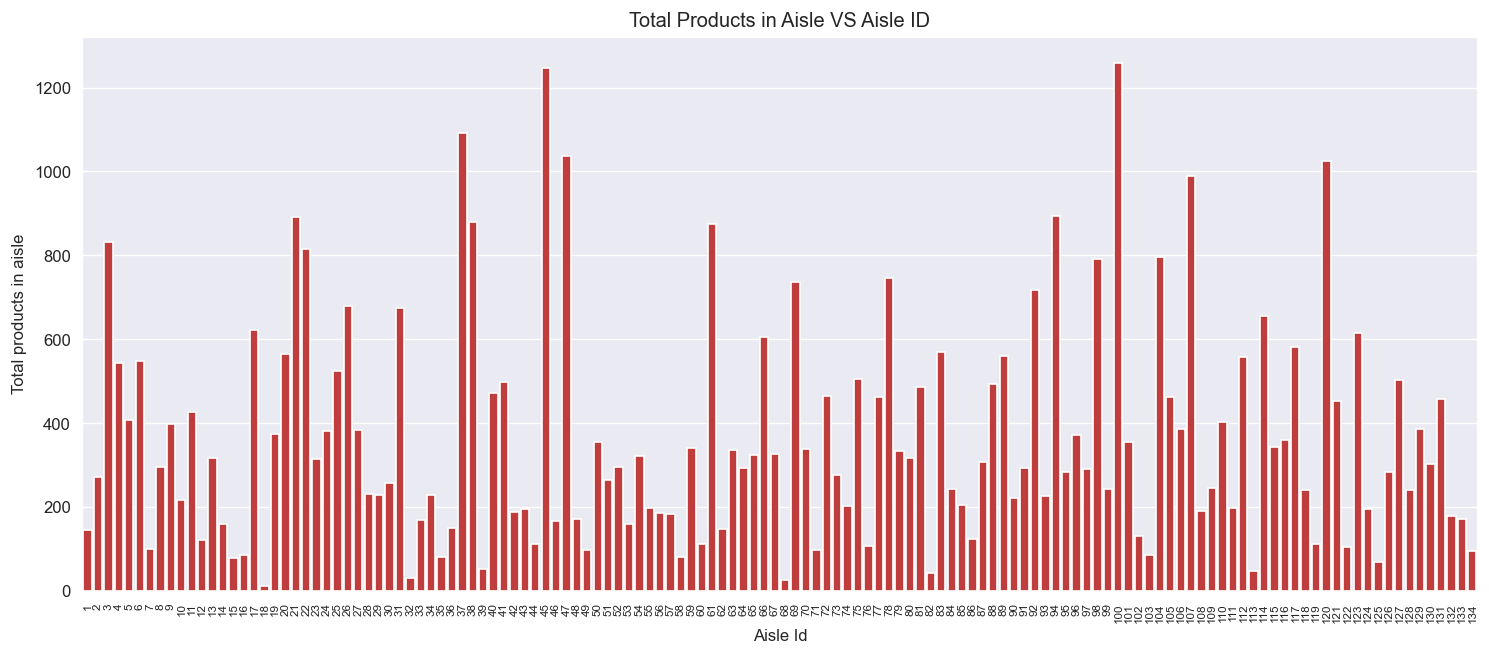

In [46]:
temp_df = products.groupby('aisle_id')['product_id'].count()

fig, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[3])
ax.set_xlabel('Aisle Id')
ax.set_ylabel('Total products in aisle')
ax.xaxis.set_tick_params(rotation=90, labelsize = 7)
ax.set_title('Total Products in Aisle VS Aisle ID', size = 12);
#fig.savefig('Total Products in Aisle VS Aisle ID.png')

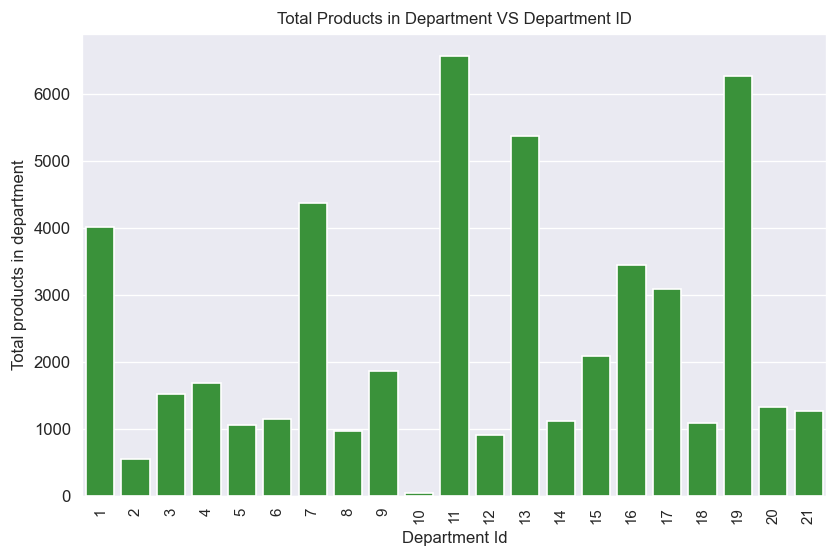

In [47]:
temp_df = products.groupby('department_id')['product_id'].count()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[2])
ax.set_xlabel('Department Id')
ax.set_ylabel('Total products in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Products in Department VS Department ID', size = 10);
#fig.savefig('Total Products in Department VS Department ID.png')

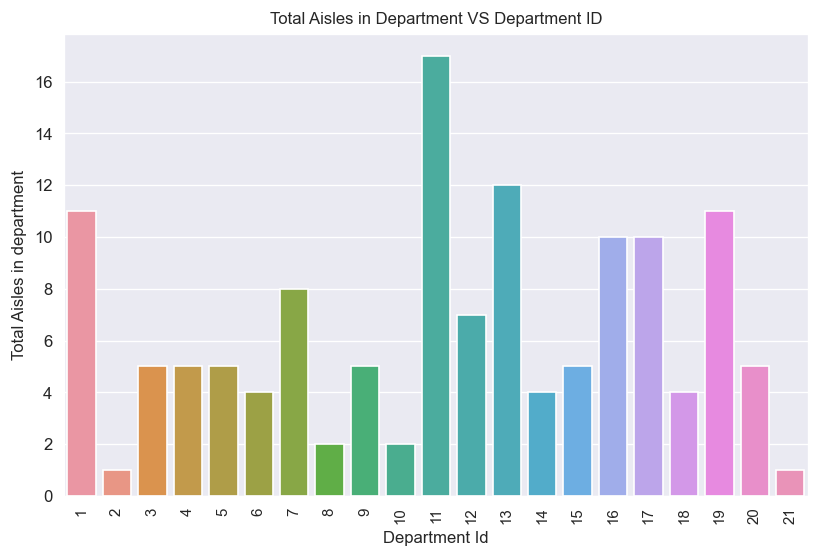

In [48]:
temp_df = products.groupby('department_id')['aisle_id'].nunique()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Department Id')
ax.set_ylabel('Total Aisles in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Aisles in Department VS Department ID', size = 10);
#fig.savefig('Total Aisles in Department VS Department ID.png')

## Exploratory Data Analysis


### Data preparation

For Analysis, I will combine all the Tables and will create one single dataframe by:
* combining order_products_train and order_products_prior as order_products.
* Then merge it with other tables based on order_id, product_id, aisle_id and department_id.

In [49]:
order_products_train.shape

(1384617, 4)

In [50]:
order_products = order_products_prior.append(order_products_train)
order_products.shape

(33819106, 4)

In [51]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(33819106, 15)

# Analysis

In [52]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [53]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


### Aisles

***Total Orders and Reorders From Most Popular Aisles***


In [54]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

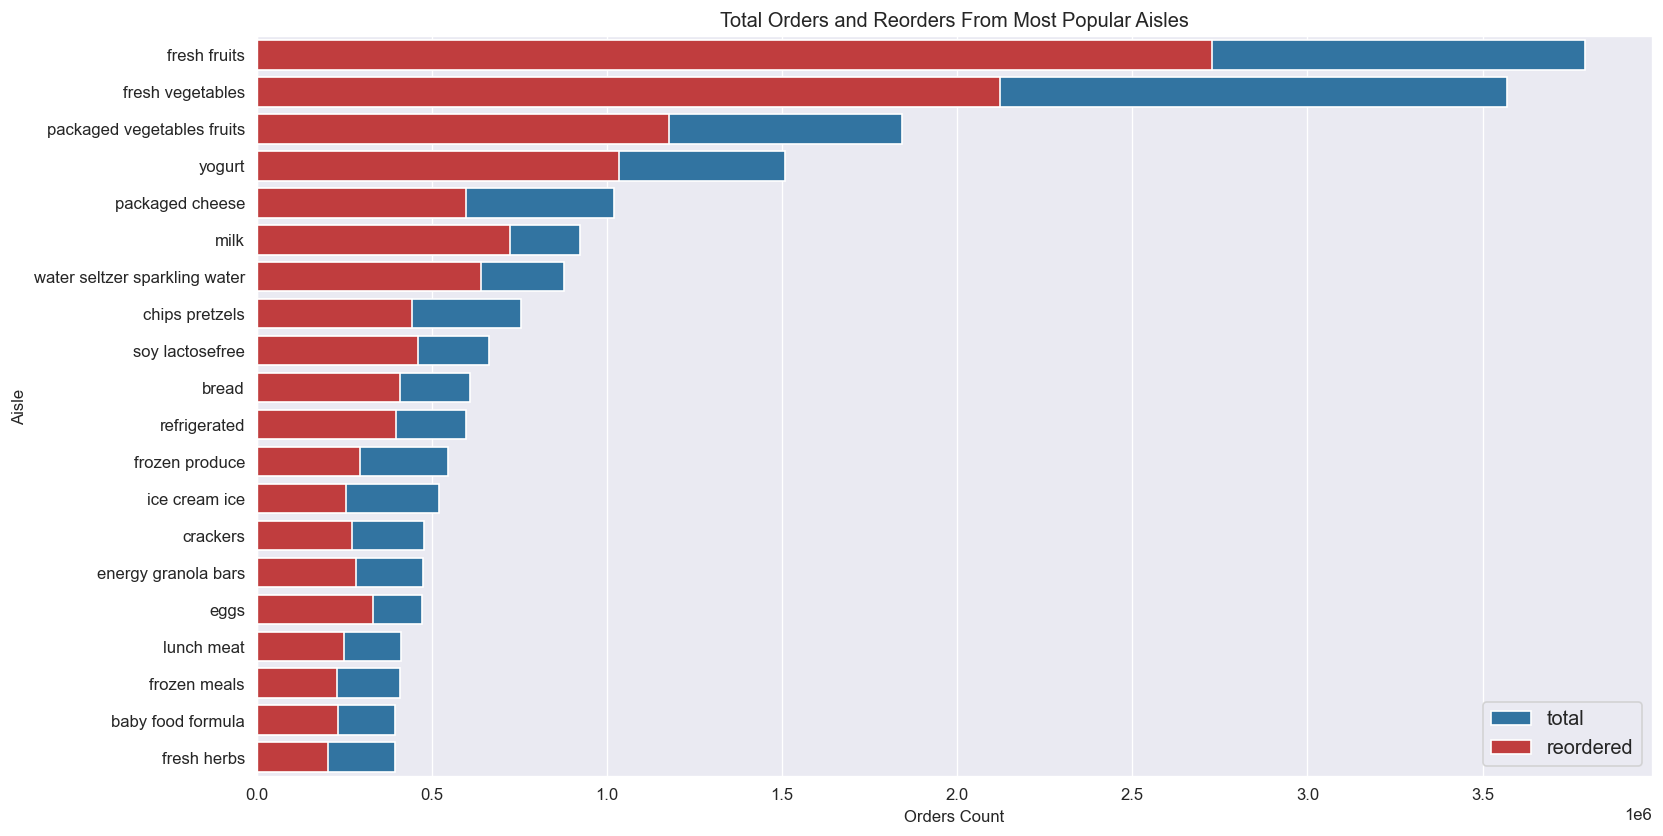

In [55]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

***20 Aisles with Highest Reorder Ratio***


In [56]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

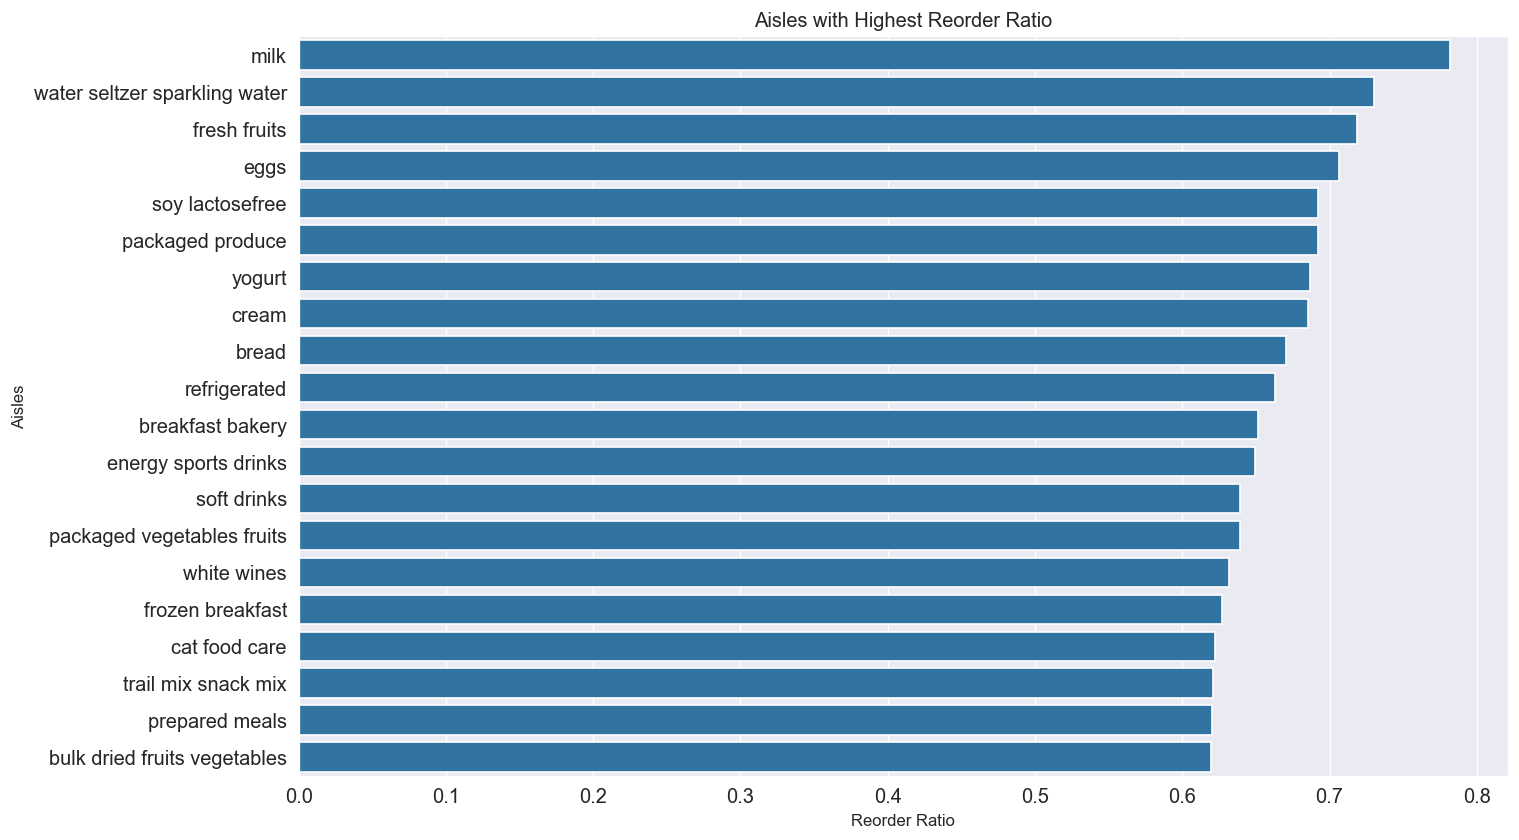

In [57]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

***20 Aisles with Lowest Reorder Ratio***


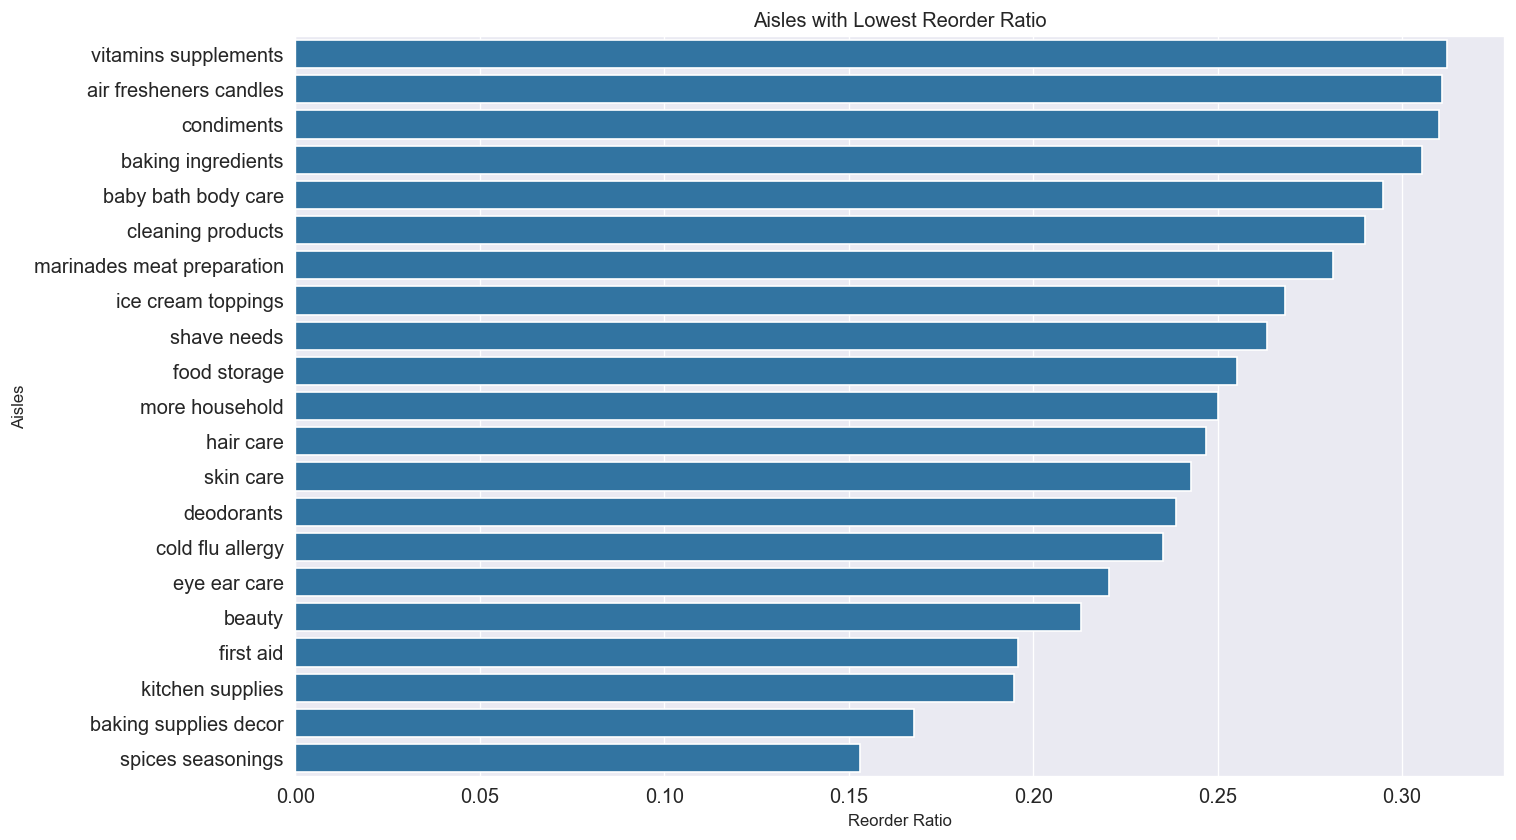

In [58]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[-21:], x = temp_df.reorder_ratio[-21:], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Lowest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

### Departments

***Total Orders and Reorders From Departments***

Departments cotaining large count of products
* Personal care
* Pantry
* Snacks

5 Most departments ordered from
* 29% of ordered products from department: produce
* dairy eggs
* snacks
* beverages
* frozen

5 Most aisles ordered from
* 14% of ordered products from aisle: fresh fruit
* fresh vegetables
* packaged vegetables fruits
* yogurt
* packaged cheese

3 Most reordered from departments
* dairy eggs: by 71% products from this department will be reordered
* beverages: by 69.5% products from this department will be reordered
* produce: : by 69.13% products from this department will be reordered

In [59]:
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

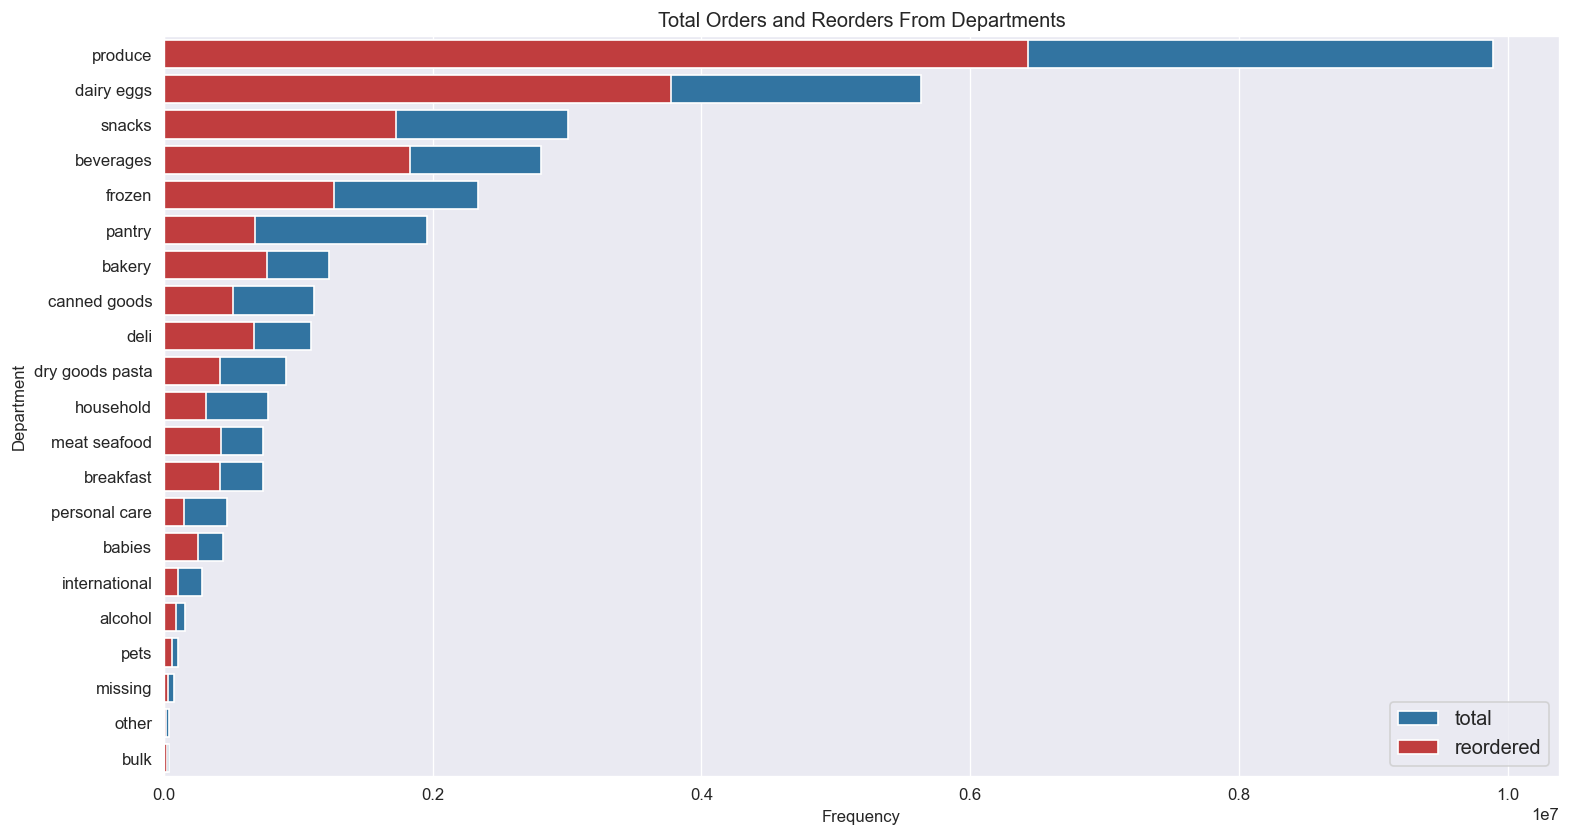

In [60]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["total"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color=color[3], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

In [61]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

***Departments with Highest Reorder Ratio***

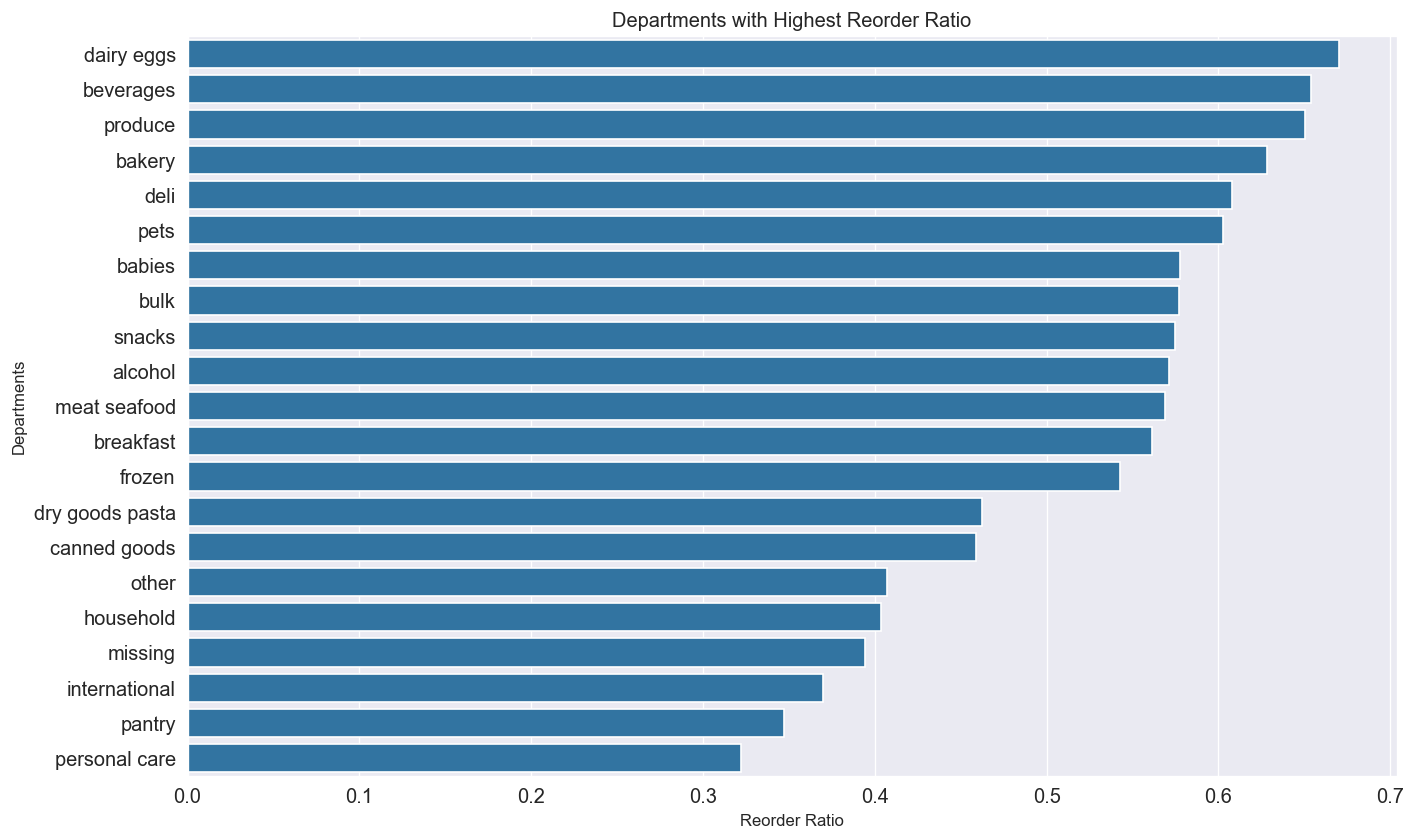

In [62]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.department, x = temp_df.reorder_ratio, color=color[0])
ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

### Products

In [63]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

***Most Popular Products***


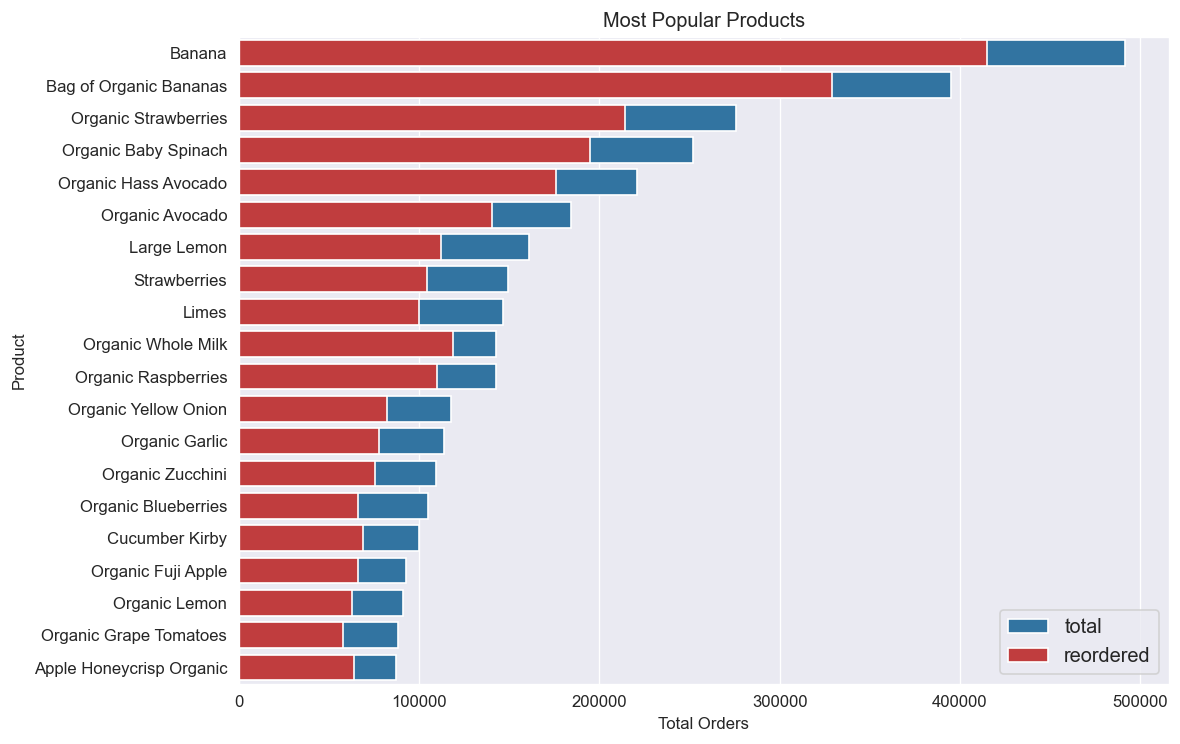

In [64]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [65]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
40147,Orange Energy Shots,13,12,0.923077
20296,Chocolate Love Bar,102,94,0.921569
30746,Soy Powder Infant Formula,35,32,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
35213,"Energy Shot, Grape Flavor",22,20,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27,0.900000
23918,Bars Peanut Butter,69,62,0.898551
24218,Soy Crisps Lightly Salted,67,60,0.895522


### Product Users

In [66]:
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [67]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84,0.933333
28415,Orange Energy Shots,1,13,12,0.923077
8537,Chocolate Love Bar,8,102,94,0.921569
41723,Soy Powder Infant Formula,3,35,32,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27,0.900000
3832,Bars Peanut Butter,7,69,62,0.898551
41712,Soy Crisps Lightly Salted,7,67,60,0.895522


***Total Product Orders VS Total Unique Product Buyers***


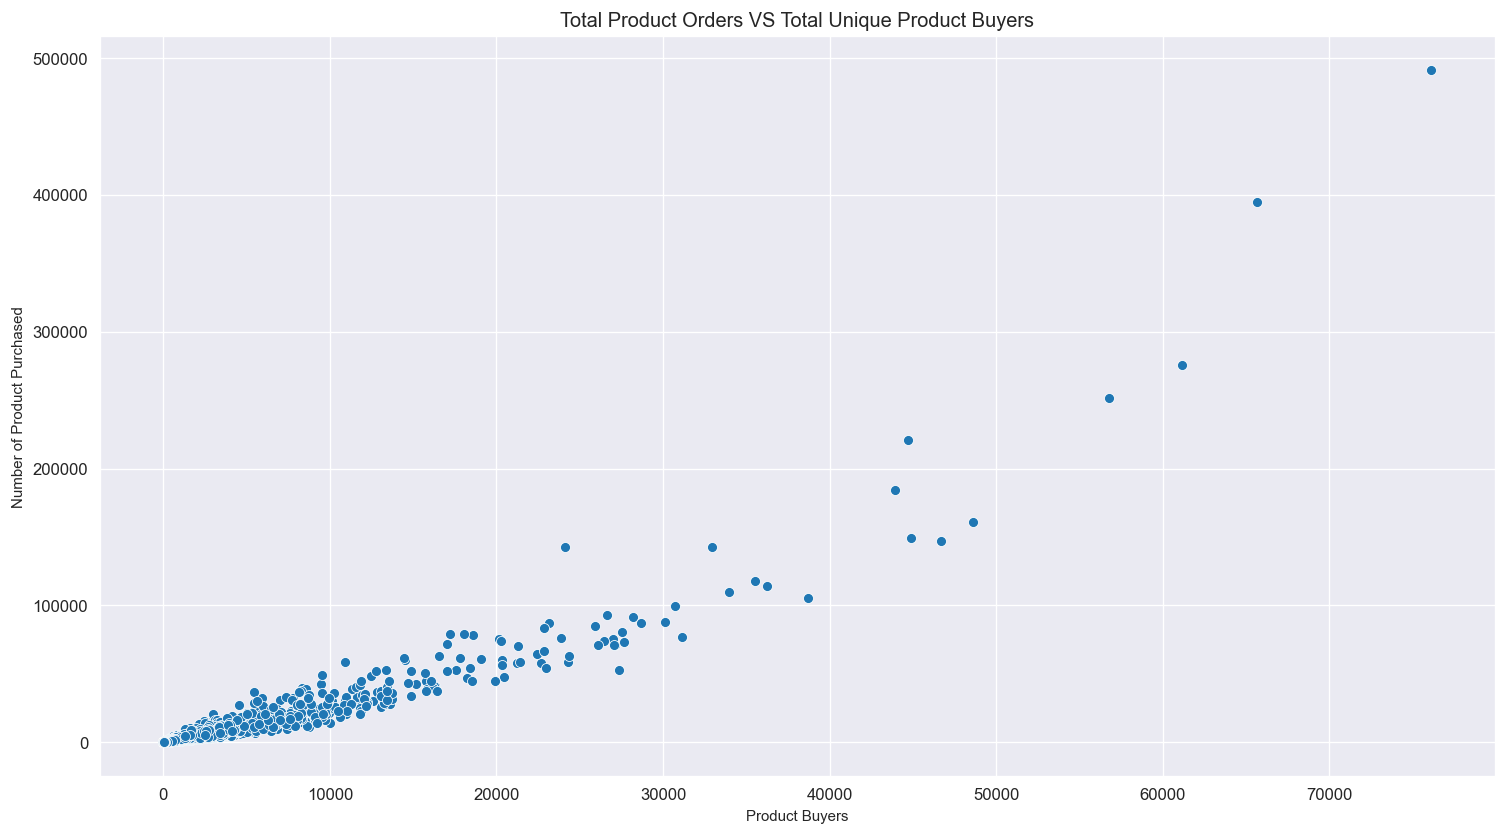

In [68]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users)
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

***Reorder Percentage VS Total Orders***

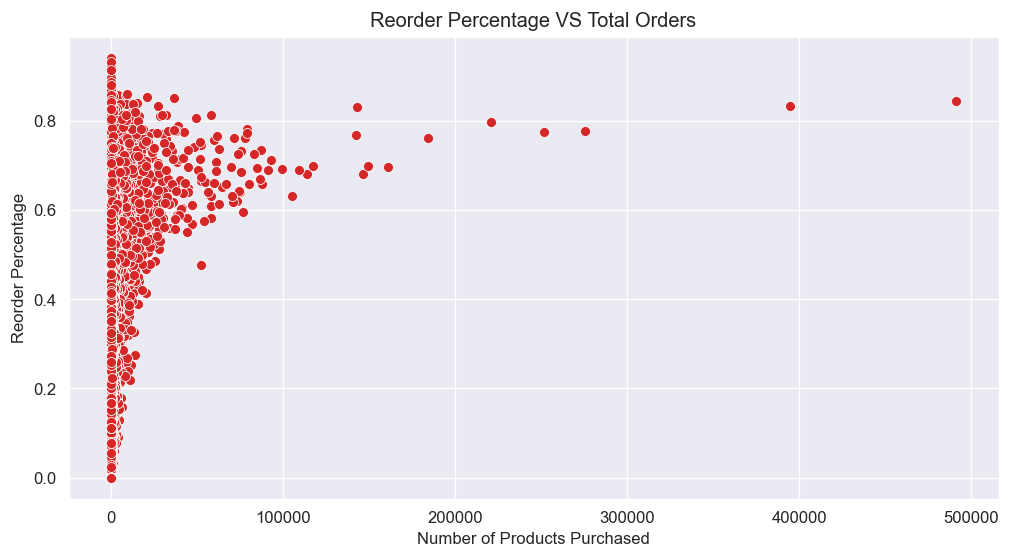

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio, color = color[3])
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

***Reorder Percentage VS Total Unique Users***

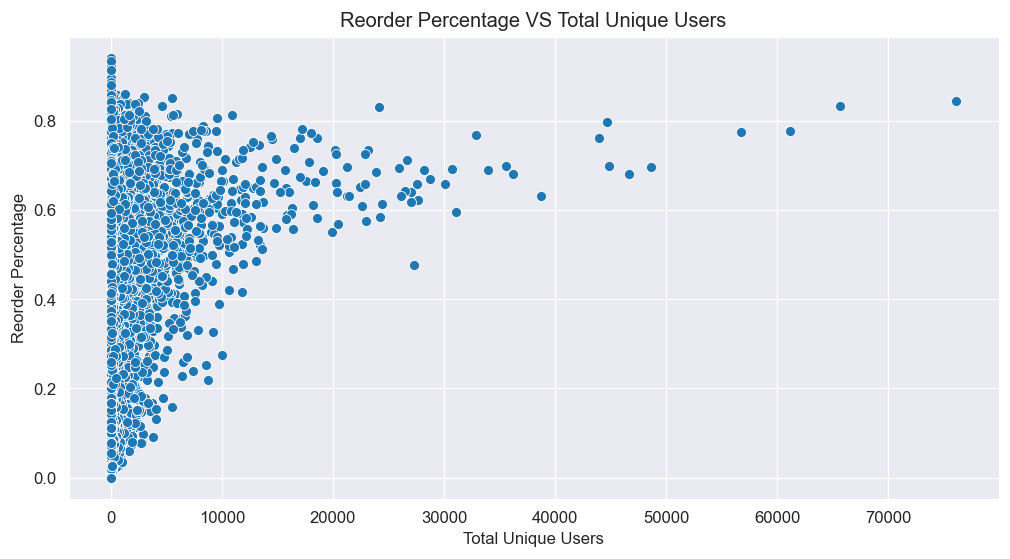

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total_users, y = product_unique_users.reorder_ratio, color = color[0])
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Unique Users")
plt.show()

***Organic Vs Inorganic***

In [71]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3,0.214286,False
2,#2 Mechanical Pencils,9,9,0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483,False


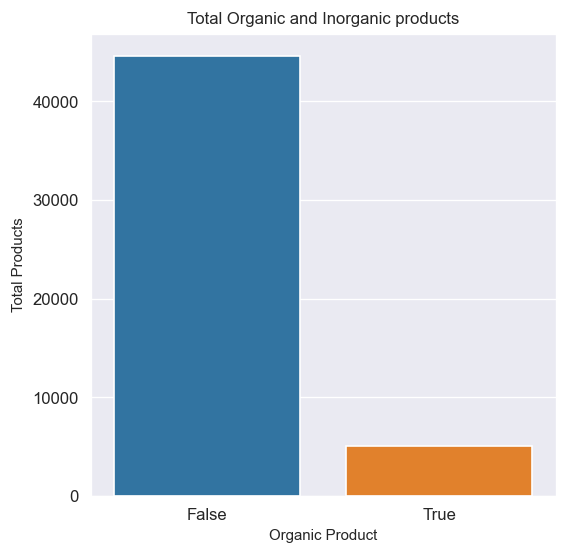

In [72]:

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

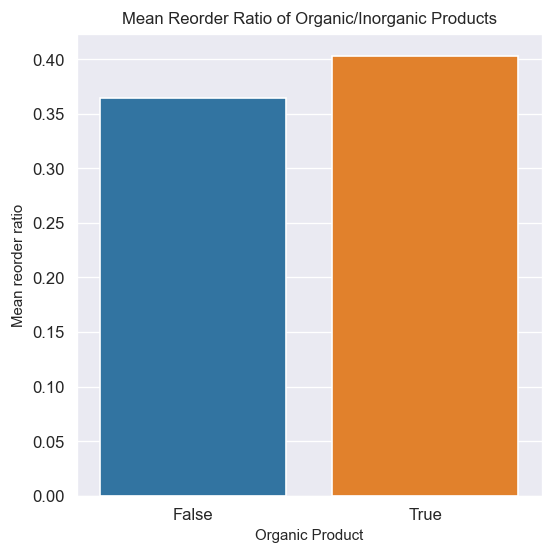

In [73]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

***Add to Cart Order VS Reorder***


In [74]:
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


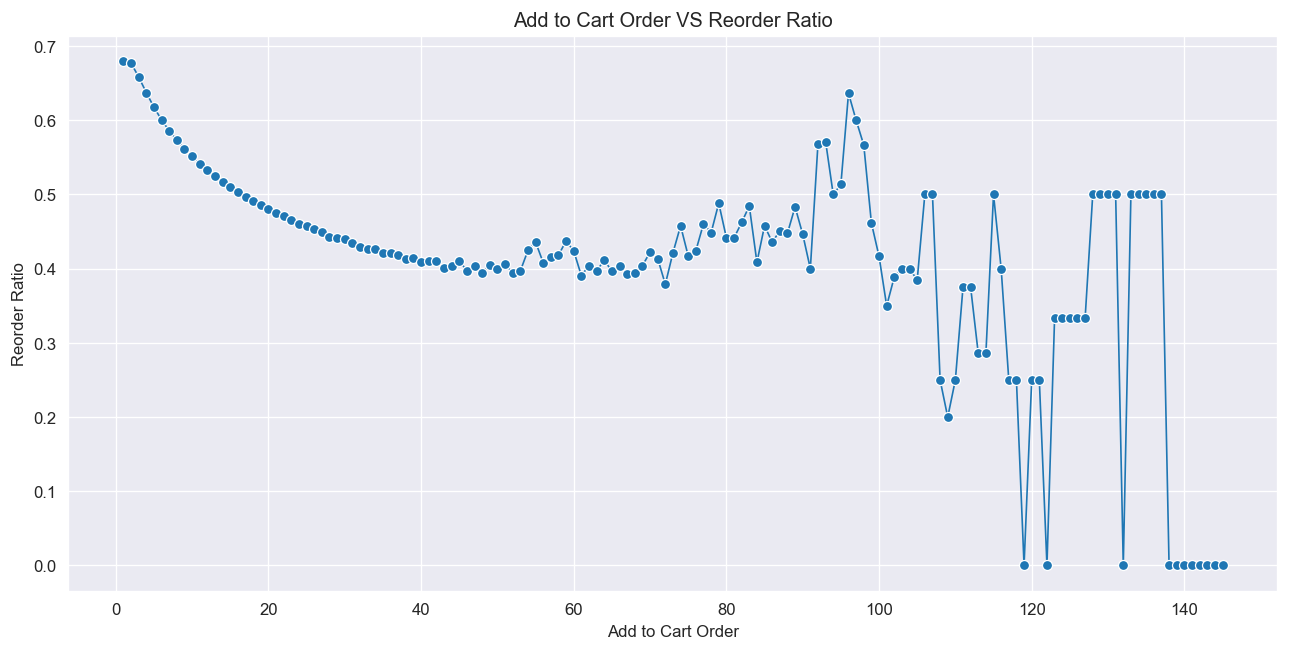

In [75]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

***Most Popular Products on different days***

In [76]:
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

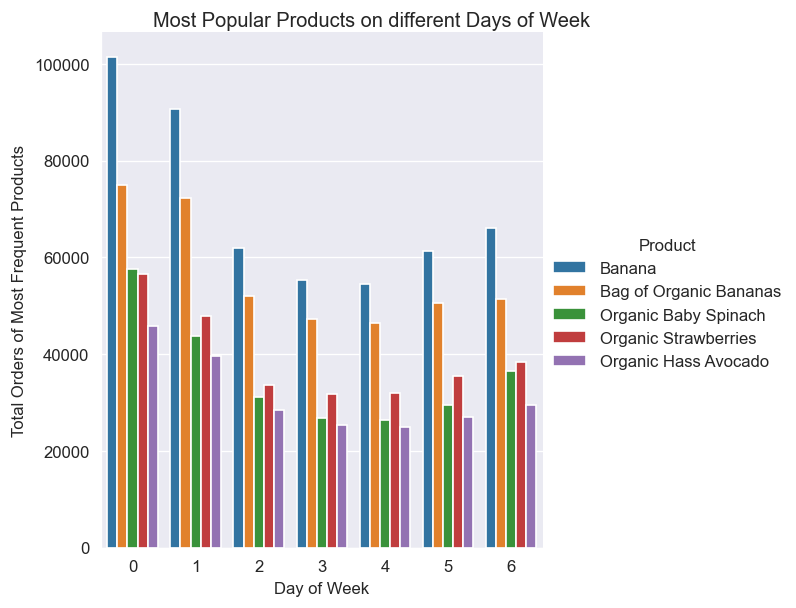

In [77]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")

# Market Basket Analysis

Market basket analysis scrutinizes the products customers tend to buy together, and uses the information to decide which products should be cross-sold or promoted together. The term arises from the shopping carts supermarket shoppers fill up during a shopping trip.

Association Rule Mining is used when we want to find an association between different objects in a set, find frequent patterns in a transaction database, relational databases or any other information repository.

The most common approach to find these patterns is Market Basket Analysis, which is a key technique used by large retailers like Amazon, Flipkart, etc to analyze customer buying habits by finding associations between the different items that customers place in their “shopping baskets”. The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers. The strategies may include:

* Changing the store layout according to trends
* Customers behavior analysis
* Catalog Design
* Cross marketing on online stores
* Customized emails with add-on sales, etc.

## Matrices
* ### Support: 
Its the default popularity of an item. In mathematical terms, the support of item A is the ratio of transactions involving A to the total number of transactions.

* ### Confidence* : 
    * Likelihood that customer who bought both A and B. It is the ratio of the number of transactions involving both A and B and the number of transactions involving B.
    * Confidence(A => B) = Support(A, B)/Support(A)

* ### Lift : 
    * Increase in the sale of A when you sell B.
    * Lift(A => B) = Confidence(A, B)/Support(B)
    * Lift (A => B) = 1 means that there is no correlation within the itemset.
    * Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.
    * Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.



In [78]:
# O ` o

In [79]:
Order_products = order_products_prior.append(order_products_train)
Order_products.shape

(33819106, 4)

In [80]:
Order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [81]:
Order_products.product_id.nunique()

49685

Out of 49685 keeping top 100 most frequent products.

In [82]:
product_counts = Order_products.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:100].reset_index(drop = True)
product_counts = product_counts.merge(products, on = 'product_id', how = 'left')
product_counts.head(10)

,product_id,frequency,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4
5,47766,184224,Organic Avocado,24,4
6,47626,160792,Large Lemon,24,4
7,16797,149445,Strawberries,24,4
8,26209,146660,Limes,24,4
9,27845,142813,Organic Whole Milk,84,16


Keeping 100 most frequent items in order_products dataframe

In [83]:
freq_products = list(product_counts.product_id)
freq_products[1:10]

[13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845]

In [84]:
len(freq_products)

100

In [85]:
order_products = Order_products[Order_products.product_id.isin(freq_products)]
order_products.shape

(7795471, 4)

In [86]:
order_products.order_id.nunique()

2444982

In [87]:
order_products = order_products.merge(products, on = 'product_id', how='left')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,28985,2,1,Michigan Organic Kale,83,4
1,2,17794,6,1,Carrots,83,4
2,3,24838,2,1,Unsweetened Almondmilk,91,16
3,3,21903,4,1,Organic Baby Spinach,123,4
4,3,46667,6,1,Organic Ginger Root,83,4


Structuring the data for feeding in the algorithm



In [88]:
basket = order_products.groupby(['order_id', 'product_name'])['reordered'].count().unstack().reset_index().fillna(0).set_index('order_id')
basket.head()

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
del product_counts, products, order_products, order_products_prior, order_products_train


encoding the units



In [90]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1 
    
basket = basket.applymap(encode_units)
basket.head()

product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
basket.size

244498200

In [92]:
basket.shape


(2444982, 100)

Creating frequent sets and rules



In [93]:
frequent_items = apriori(basket, min_support=0.01, use_colnames=True, low_memory=True)
frequent_items.head()

,support,itemsets
0,0.016062,(100% Raw Coconut Water)
1,0.025814,(100% Whole Wheat Bread)
2,0.015800,(2% Reduced Fat Milk)
3,0.035694,(Apple Honeycrisp Organic)
4,0.029101,(Asparagus)


In [94]:
frequent_items.shape

(129, 2)

In [95]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35,(Large Lemon),(Limes),0.065764,0.059984,0.011860,0.180345,3.006544,0.007915,1.146843,0.714372
34,(Limes),(Large Lemon),0.059984,0.065764,0.011860,0.197723,3.006544,0.007915,1.164480,0.709980
53,(Organic Raspberries),(Organic Strawberries),0.058325,0.112711,0.014533,0.249174,2.210731,0.007959,1.181751,0.581582
52,(Organic Strawberries),(Organic Raspberries),0.112711,0.058325,0.014533,0.128940,2.210731,0.007959,1.081069,0.617230
37,(Organic Avocado),(Large Lemon),0.075348,0.065764,0.010538,0.139862,2.126728,0.005583,1.086147,0.572966
36,(Large Lemon),(Organic Avocado),0.065764,0.075348,0.010538,0.160244,2.126728,0.005583,1.101097,0.567088
47,(Organic Strawberries),(Organic Blueberries),0.112711,0.042956,0.010235,0.090809,2.114024,0.005394,1.052633,0.593909
46,(Organic Blueberries),(Organic Strawberries),0.042956,0.112711,0.010235,0.238274,2.114024,0.005394,1.164840,0.550621
48,(Organic Hass Avocado),(Organic Raspberries),0.090339,0.058325,0.010966,0.121389,2.081257,0.005697,1.071777,0.571115
49,(Organic Raspberries),(Organic Hass Avocado),0.058325,0.090339,0.010966,0.188018,2.081257,0.005697,1.120298,0.551699
